# Testing Notebook 03

This notebook is where I'm developing the containment methods for multivariate functions in $\mathbb{R}^n$

In [91]:
import pandas as pd
import numpy as np
from statdepth.depth import banddepth, samplebanddepth

import plotly.express as px
import matplotlib.pyplot as plt

We now test the `Delaunay` object from `scipy`, which should allow us to analyze simplices formed by our datapoints.

In [92]:
from scipy.spatial import Delaunay

`o` is a convex hull and `c` is a convex hull formed by the same nodes but an addition node inside. I want to figure out how to detect the fact that this extra inner point doesn't change the simplex

In [93]:
p1 = np.array([[0,0], [1,1], [2,0]])
o = Delaunay(p1)

p2 = np.array([[0,0], [1,1], [2,0], [1, .5]])
c = Delaunay(p2)

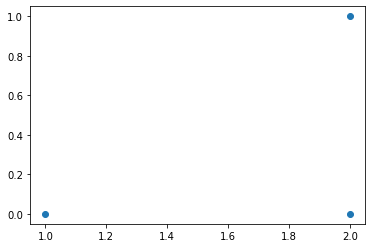

In [94]:
ohull = o.convex_hull
plt.scatter(x=[i[0] for i in ohull], y=[i[1] for i in ohull]);

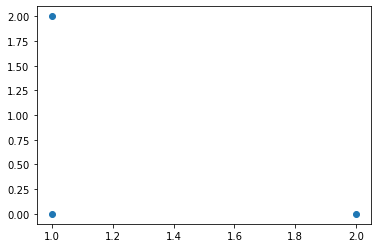

In [95]:
chull = c.convex_hull
plt.scatter(x=[i[0] for i in chull], y=[i[1] for i in chull]);

This is the Delaunay with no inner points

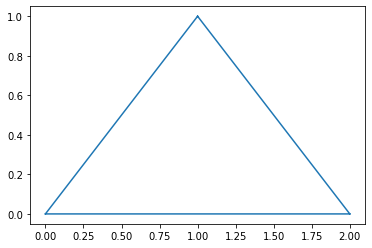

In [96]:
plt.triplot(p1[:,0], p1[:,1], o.simplices);

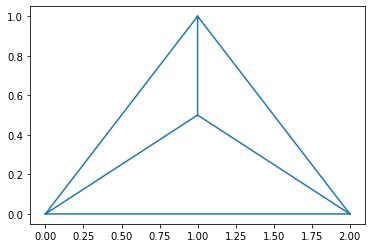

In [97]:
plt.triplot(p2[:,0], p2[:,1], c.simplices);

In [98]:
o.simplices

array([[2, 1, 0]], dtype=int32)

In [99]:
c.simplices

array([[2, 3, 0],
       [3, 1, 0],
       [1, 3, 2]], dtype=int32)

The Delaunay object doesn't work well, so we'll use `ConvexHull` instead

In [100]:
from scipy.spatial import ConvexHull

In [101]:
ohull = ConvexHull(p1)
chull = ConvexHull(p2)

In [102]:
ohull.vertices

array([0, 2, 1], dtype=int32)

In [103]:
all(chull.vertices == ohull.vertices)

True

In [104]:
df = pd.DataFrame([[0,0], [1,1], [2,0], [1, .5]])
df

,0,1
0,0,0.0
1,1,1.0
2,2,0.0
3,1,0.5


In [105]:
t = ConvexHull(df, incremental=True)
t.vertices

array([0, 2, 1], dtype=int32)

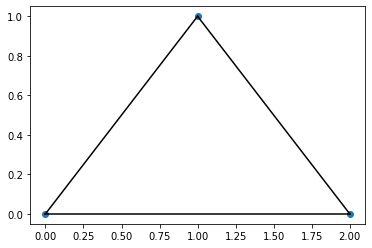

In [106]:
def plot_simplex(points, hull):
    plt.plot(points[:,0], points[:,1], 'o')
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')
        
plot_simplex(p1, t)

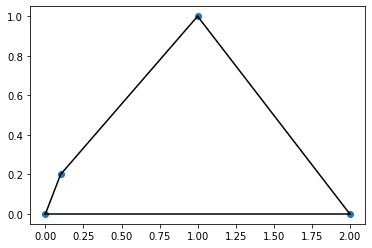

In [109]:
p1 = np.array([[0,0], [1,1], [2,0], [.1, .2]])
plot_simplex(p1, ConvexHull(p1))

In [113]:
pd.Series([1,2])

0    1
1    2
dtype: int64

In [114]:
def is_in_simplex(simplex_points, point) -> bool:
    # Generate convex hull and grab its vertices
    hull = ConvexHull(df, incremental=True)
    vertices = hull.vertices
    
    # Generate the convex hull with new point
    hull.add_points([point])
    
    # Check if they are the same
    # If they are, then the added point must be contained in the original hull
    if len(vertices) != len(hull.vertices):
        return False
    
    return all(vertices == hull.vertices)

is_in_simplex(df, pd.Series([1, .5]))

True